<a href="https://colab.research.google.com/github/deltorobarba/science/blob/main/otoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Black Hole Physics: Simulating Light Cone of Information Scrambling**

In [ ]:
!pip install cirq openfermion -q
import cirq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color="blue">**Description of Quantum Systems: Classical vs Quantum Methods**

Quantum systems in chemistry and physics can be described and computed with either classical and quantum methods:

* **Model**: Classical (Newton Mechanics) vs Quantum (Schrödinger equation)
* **Type**: Static (State) vs Dynamical (Evolution)
* **Computing**: Classical Computing vs Quantum Computing

<font color="blue">*1. Classical (Newtonian) Mechanics (**Static and Dynamic**): $F = m \cdot a$*
* Ignores electrons and consider atoms as spheres connected by springs (force fields)
* **Classical - Dynamic**: Molecular dynamics (MD). How proteins enfold and move? GROMACS, NAMD, AMBER.
* **Classical - Static**: Molecular Docking / Energy Minimization. Geometrically: Does medication fit to enzyme? AutoDock, Rosetta.
* **Quantum computing methods:** Future: Navier Stokes (fluid dynamics) with HHL to solve linear systems and differential equations exponentially faster than classical computers. For weather and climate: simulate weather with a much finer grid (e.g. 100m)

<font color="blue">*2. Quantum Mechanics (**Static**): Time-independent Schrödinger Equation $\hat{H}|\psi\rangle = E|\psi\rangle$*
* Includes electrons. **Approximates Ground State via optimization** with variation $\delta \langle H \rangle = 0$ to find global optimum in energy landscape. Stationary state important for calculating binding energies: If $\psi$ is an eigenstate of $\hat{H}$, then time evolution is trivial: $\Psi(t) = \psi e^{-iEt/\hbar}$. Probability density $|\Psi(t)|^2$ remains constant over time = states are stationary.
* **Classical computing:** Hartree-Fock (mean field of $\psi$), DFT (electron density $\rho$), Post-HF (calculate correlation energies)
* **Quantum computing** (**NISQ**): Variational Quantum Eigensolver. Quantum Advantage: finds correlation energy with entanglement.

<font color="red">*3. Quantum Mechanics (**Dynamic**): Time-dependent Schrödinger Equation $i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r}, t) = \hat{H} \Psi(\mathbf{r}, t)$*
* **Simulate Time Evolution** $e^{-i\hat{H}t}$ of Quantum State $|\Psi(t)\rangle = e^{-i\hat{H}t/\hbar} |\Psi(0)\rangle$ via Unitary Transformation. For Quantum Chaos, OTOC, Scrambling (Black Holes) reaction dynamics (observe how bonds break and reform during a collision). No forward theorem!
* **Classical computing**: Time-Dependent DFT (TD-DFT) used to classically calculate excitations (fluorescence, spectra). However only for short times and small systems. To solve the time-dependent equation $i\hbar \frac{\partial}{\partial t} \Psi = \hat{H} \Psi$ classically at scale, you have to apply operator $e^{-i\hat{H}t/\hbar}$ to wavefunction. In system with $N$ particles, complexity grows exponentially with $N$.
* **Quantum computing** (**Fault-Tolerant**): LCU, Trotterization, Qubitization (with Quantum Walks and Block Encoding)

<font color="blue">*Appendix: Wy we can solve the Schrödinger equation analytically only for very small systems*

* **Analytical** solution for Schrödinger in Hydrogen atom. But a second electron add electron-electron repulsion = three-body problem.
* **Approximate** Schrödinger with DFT and HF on classical computers via **optimization (variation)** for larger systems than Hydrogen
* **Simulate** time evolution for even larger systems = Quantum computer doesn't store information anymore - **it is the Hilbert space!**


<font color="blue">**Quantum Dynamics: Quantum Chaos, Scrambling and OTOC**

<font color="blue">*Quantum Chaos (Phenomena)*

* **Quantum Chaos** how deterministic quantum systems emulate behavior of classical chaotic systems despite linearity of Schrödinger. Unlike classical chaos (sensitivity to initial conditions), Quantum Chaos is defined by the statistics of the energy eigenvalues (Energy Level Statistics).
* **Spectral Statistics:** Since trajectories do not exist, chaos is identified by distribution of energy eigenvalues. Chaotic systems exhibit **Level Repulsion** (Wigner-Dyson statistics), whereas non-chaotic (integrable) systems show **Level Clustering** (Poisson statistics). In a chaotic system, energy levels repel each other (Wigner-Dyson distribution). They don't like to bunch up. In a non-chaotic (integrable) system, energy levels are random (Poisson distribution) and often cross. Chaotic Hamiltonians are the "engines" that drive thermalization and scrambling.
* **Quantum Suppression of Chaos:** Interference effects often "smear" classical chaotic behavior, making quantum systems more stable over long periods than their classical counterparts.
* **Quantum Scars:** A phenomenon where the probability density of certain high-energy eigenstates (wavefunctions) remains concentrated around the paths of unstable classical periodic orbits, effectively "scarring" the quantum state with classical memory.

<font color="blue">*Quantum Scrambling (Mechanism)*

* Scrambling is dynamic process by which local information is redistributed into global, many-body entanglement.
* Quantum Scrambling: delocalization of quantum information. Information initially stored in a single qubit (local) spreads via entanglement to cover the entire system (global).
  * Local vs. Global: A "simple" operator (like a Pauli $X$ on qubit 1) evolves into a "complex" operator (a long string of $X, Y, Z$ on many qubits).
  * "Hidden" Information: Once scrambled, the information is inaccessible to local measurements. You would need to measure half the system's particles simultaneously to recover the original bit.
  * Use Case: This is why Black Holes are considered the "fastest scramblers in nature."
* **Operator Spreading:**  A local operator $\hat{V}$ (e.g., a Pauli gate on one qubit) evolves under a chaotic Hamiltonian into a highly non-local operator $\hat{V}(t) = e^{iHt}\hat{V}e^{-iHt}$ that consists of long chains of Pauli strings across the entire Hilbert space.
* **Thermalization & ETH:** Scrambling is the microscopic engine behind the **Eigenstate Thermalization Hypothesis (ETH)**. It explains how a pure quantum state can locally appear thermal; the "missing" information is not lost but hidden in complex many-body correlations.
* **Significance:** Information becomes "scrambled" when it cannot be recovered by any local measurement, requiring a measurement of a significant fraction of the total system to reconstruct.

<font color="blue">*Out-of-Time-Ordered Correlators (OTOC metric)*
* To visualize **Quantum Chaos** and **Scrambling**, we will calculate the OTOC
* OTOC is mathematical "thermometer" used to quantify rate of scrambling and quantum Lyapunov exponent: How do we prove information is scrambled and not just gone? We try to reverse time! An OTOC measures how sensitive reversal is to a tiny error (like a "Butterfly Effect"). "If I poke the system now, how much does it affect a measurement I made in the past (if I evolved backward)?"
* Formula: $C(t) = \langle [\hat{W}(t), \hat{V}(0)]^\dagger [\hat{W}(t), \hat{V}(0)] \rangle$
  * $\hat{V}(0)$: The "Butterfly" (a small local perturbation at start).
  * $\hat{W}(t)$: The measurement later in time.
  * At $t=0$, $W$ and $V$ commute (they are on different qubits). The commutator is 0.
  * As time evolves, $\hat{W}(t)$ grows spatially (scrambling).
  * Eventually, $\hat{W}(t)$ hits the qubit where $\hat{V}$ sits. They no longer commute.
  * The commutator grows, and $C(t)$ deviates from zero.
  * Result: rate at which the OTOC grows is Lyapunov Exponent ($\lambda$), the "speed limit" of chaos.
* Connection: **Schrödinger** $|\Psi(t)\rangle = e^{-iHt} |\Psi(0)\rangle$ to **OTOC** $C(t) = \langle [\hat{W}(t), \hat{V}(0)]^\dagger [\hat{W}(t), \hat{V}(0)] \rangle$
  * OTOC is object of **Time-Dependent Schrödinger Equation (TDSE)**.
  * **Time-Dependent Schrödinger Equation** is Law of Motion and tells how a state moves: $|\Psi(t)\rangle = e^{-iHt} |\Psi(0)\rangle$.
  * **OTOC** is Diagnostic Tool/formula to ask TDSE: "Is the movement you are describing chaotic or ordered?"
  * OTOC formula $C(t) = \langle [\hat{W}(t), \hat{V}(0)]^\dagger [\hat{W}(t), \hat{V}(0)] \rangle$, the "Time-Dependent" part is hidden inside $\hat{W}(t)$. To calculate $\hat{W}(t)$, we use the **Heisenberg Evolution** $\hat{W}(t) = e^{iHt} \hat{W}(0) e^{-iHt}$. This exponential $e^{-iHt}$ is the solution to the Schrödinger Equation. Without the Schrödinger Equation, there is no $\hat{W}(t)$, and without $\hat{W}(t)$, there is no OTOC.
* **Four-Point Function:** Unlike standard correlators, OTOC requires evolving forward and backward in time: $W(t) = e^{iHt} W(0) e^{-iHt}$. In the early stages of a chaotic system, the OTOC grows exponentially: $C(t) \sim \hbar^2 e^{2\lambda t}$. Quantum Lyapunov Exponent** ($\lambda$) is the direct quantum analogue of classical Lyapunov exponent. It represents speed at which the "butterfly effect" (perturbation $\hat{V}$) propagates through the system's degrees of freedom.

<font color="blue">*Appendix*
* Study of scrambling reaches its physical limit in the context of General Relativity and String Theory. **The Fastest Scramblers:** Theoretical evidence (via the AdS/CFT correspondence) suggests that Black Holes are the most efficient scramblers of information allowed by the laws of physics. **The Maldacena-Shenker-Stanford (MSS) Bound:** There is a fundamental upper limit on the rate of chaos (the Lyapunov exponent) in any thermal quantum system: $\lambda \leq \frac{2\pi k_B T}{\hbar}$. **Black Hole Saturation:** Black holes are unique because they saturate this bound, exhibiting the maximum possible "speed of chaos" at their Hawking temperature.
* ETH (Eigenstate Thermalization Hypothesis): Relation to thermodynamics. ETH explains how an isolated quantum system (pure state) can act like a thermal bath (mixed state). Connection: Scrambling mixes the information so thoroughly that any local part of the system looks like a random thermal mixture, even though the global state is pure.
* Quantum Error Correction (The "Good" Side of Scrambling): Scrambling sounds bad (loss of info), but for Quantum Computers, it's good! If you encode a logical qubit into a scrambled state (like a Toric Code or Surface Code), a local error (hitting just one physical qubit) cannot destroy the information, because the info is delocalized everywhere. Insight: We use scrambling intentionally to protect data.
* If System is not scrambling: Check on the OTOC formula $C(t) = \langle [\hat{W}(t), \hat{V}(0)]^\dagger [\hat{W}(t), \hat{V}(0)] \rangle$. If the system is not scrambling (e.g., a simple rotation of independent qubits), and operator $\hat{W}$ acts on Qubit 1 while $\hat{V}$ acts on Qubit 5. Even after time $t$, will the commutator $[\hat{W}(t), \hat{V}(0)]$ ever be non-zero? In a non-scrambling system where qubits evolve independently, commutator $[\hat{W}(t), \hat{V}(0)]$ will remain zero for all time. Since there is no interaction term in the Hamiltonian to link Qubit 1 and Qubit 5, the time-evolved operator $\hat{W}(t)$ will only consist of terms acting on Qubit 1. Because operators acting on different qubits always commute, the "butterfly" never feels the "poking," and OTOC never grows.
* Methods for Simulating Quantum Time Evolution: central challenge in quantum dynamics is implementing the unitary propagator $U(t) = e^{-i\hat{H}t}$ on quantum hardware that only supports a discrete set of elementary gates. We distinguish between three primary approaches: (Trotter, LCU, Qubitization)
* OTOC for understanding quantum dynamics: moves from Schrödinger Picture (moving states) to Heisenberg Picture (moving operators).
* Lyapunov Regime" ($e^{\lambda t}$
* **Challenge: Measuring "Speed of Chaos"**. In chaos theory, we look for $C(t) \sim \epsilon e^{\lambda t}$.Increase qubits to 15. Keep $J=1, B=1$. Run simulation for a probe at Qubit 5, then Qubit 10, then Qubit 14. Plot OTOC curves together to see the "Wave" of information moving across. Distance between the "starts" of those curves divided by the time difference is the **Butterfly Velocity**.

Simulating: h_x=1.0, h_z=0.0...
Simulating: h_x=1.0, h_z=0.5...


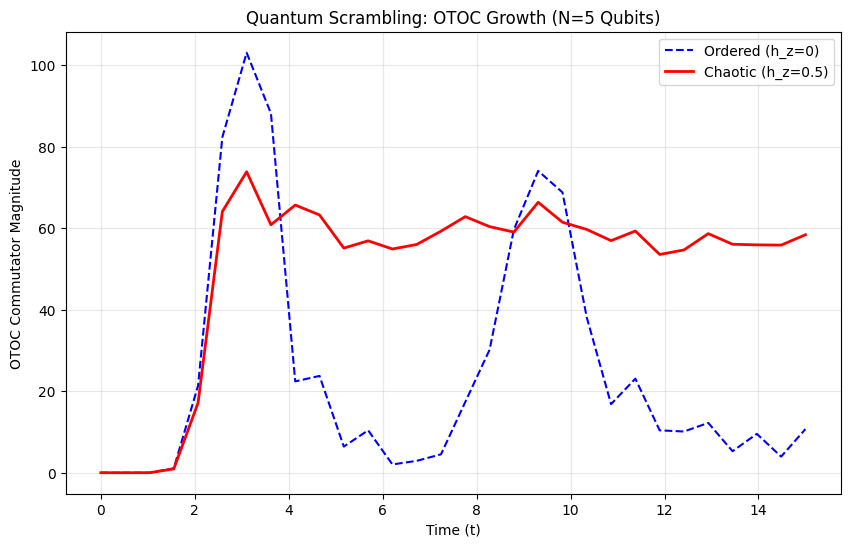

In [ ]:
# ==========================================
# OTOC (Classical Implementation)
# ==========================================

"""
* Implementation Note: Simulation vs. Reality.
  Code is based on Matrix Multiplication (`U_dag @ W @ U`) with "God mode" access to full unitary matrix.
  No need for quantum algorithm or quantum dynamic method (Qubitization/LCU/Trotter).
  Since it's running on classical computer with a small number of qubits,
  it can calculate entire matrix $e^{-iHt}$ at once using classical linear algebra.

* On a Real Quantum Computer: cannot access or calculate the matrix $e^{-iHt}$ (too big).
  Must approximate e^{-iHt}. This is where the quantum dynamics methods come in:
  * Trotterization: apply the OTOC by breaking  $e^{-iHt}$ into thousands of small gates.
  * LCU/Qubitization: apply the OTOC by encoding the Hamiltonian into an Ancilla and performing a Quantum Walk.

* To measure OTOCs on a real quantum computer (like Google Sycamore), run a LOSCHMIDT ECHO circuit:
  1. Evolve forward ($e^{-iHt}$).
  2. Apply perturbation ($\hat{V}$).
  3. Evolve backward ($e^{+iHt}$ - time reversal).
  4. Measure overlap.
"""

from scipy.linalg import norm

def get_unitary_from_circuit(qubits, t, h_x, h_z, steps=25):
    """
    Creates the Unitary Matrix U(t) for a specific Hamiltonian setup.
    H = Sum(Zi Zj) + h_x * Sum(Xi) + h_z * Sum(Zi)
    """
    circuit = cirq.Circuit()
    dt = t / steps
    n = len(qubits)

    for _ in range(steps):
        # 1. Interaction (ZZ) - The "Scrambler"
        for i in range(n - 1):
            circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))
            circuit.append(cirq.rz(rads=2 * dt).on(qubits[i+1]))
            circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))

        # 2. Transverse Field (X) - The "Driver"
        if h_x != 0:
            for i in range(n):
                circuit.append(cirq.rx(rads=2 * h_x * dt).on(qubits[i]))

        # 3. Longitudinal Field (Z) - The "Chaos Generator"
        # Adding this term breaks integrability and causes chaos.
        if h_z != 0:
            for i in range(n):
                circuit.append(cirq.rz(rads=2 * h_z * dt).on(qubits[i]))

    # Extract the full unitary matrix (2^N x 2^N)
    return cirq.unitary(circuit)

def calculate_otoc_curve(num_qubits, h_x, h_z, time_points):
    """
    Calculates the OTOC C(t) = || [W(t), V] ||^2
    V = X on Qubit 0 (The Perturbation)
    W = Z on Qubit N-1 (The Probe)
    """
    qubits = cirq.LineQubit.range(num_qubits)
    otoc_values = []

    # Define Operators V (at t=0) and W (at t=0)
    # We build them as full matrices (2^N x 2^N)

    # V = X_0 (Tensor product: X I I I...)
    op_list_V = [np.eye(2)] * num_qubits
    op_list_V[0] = np.array([[0, 1], [1, 0]]) # X
    V = op_list_V[0]
    for i in range(1, num_qubits):
        V = np.kron(V, op_list_V[i])

    # W = Z_last (Tensor product: ...I I I Z)
    op_list_W = [np.eye(2)] * num_qubits
    op_list_W[-1] = np.array([[1, 0], [0, -1]]) # Z
    W = op_list_W[-1]
    for i in range(num_qubits-2, -1, -1):
        W = np.kron(op_list_W[i], W)

    print(f"Simulating: h_x={h_x}, h_z={h_z}...")

    for t in time_points:
        if t == 0:
            otoc_values.append(0)
            continue

        # 1. Get Time Evolution Operator U(t)
        U = get_unitary_from_circuit(qubits, t, h_x, h_z)
        U_dag = U.conj().T

        # 2. Evolve W forward in time (Heisenberg Picture)
        # W(t) = U^dagger * W * U
        W_t = U_dag @ W @ U

        # 3. Calculate Commutator C = [W(t), V] = W(t)V - VW(t)
        commutator = W_t @ V - V @ W_t

        # 4. Measure "Size" of commutator (Frobenius Norm)
        # This tells us how non-commutative they have become
        c_val = np.linalg.norm(commutator) ** 2
        otoc_values.append(c_val)

    return otoc_values

# --- Simulation Setup ---
n_qubits = 5  # Small enough for matrix multiplication
times = np.linspace(0, 15.0, 30)

# Scenario 1: Ordered / Integrable (Ising Model)
# No longitudinal field (h_z = 0)
otoc_ordered = calculate_otoc_curve(n_qubits, h_x=1.0, h_z=0.0, time_points=times)

# Scenario 2: Chaotic (Non-Integrable)
# We add a longitudinal field (h_z = 0.5) to break symmetry
otoc_chaotic = calculate_otoc_curve(n_qubits, h_x=1.0, h_z=0.5, time_points=times)

# --- Plotting ---
plt.figure(figsize=(10, 6))

plt.plot(times, otoc_ordered, label='Ordered (h_z=0)', color='blue', linestyle='--')
plt.plot(times, otoc_chaotic, label='Chaotic (h_z=0.5)', color='red', linewidth=2)

plt.title(f'Quantum Scrambling: OTOC Growth (N={n_qubits} Qubits)')
plt.xlabel('Time (t)')
plt.ylabel('OTOC Commutator Magnitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# ==========================================
# OTOC (Quantum Implementation)
# ==========================================

"""
# OTOC with qubitization (fault-tolerant)
To calculate $C(t) = \langle [\hat{W}(t), \hat{V}]^\dagger [\hat{W}(t), \hat{V}] \rangle$
on a quantum computer using Qubitization, the circuit must follow this sequence:
  1. Forward Evolution: Apply the Qubitization Walk $n$ times (simulating time $+t$).
  2. Perturbation: Apply the Butterfly operator $\hat{V}$ (e.g., an $X$ gate).
  3. Backward Evolution: Apply the **Inverse** Qubitization Walk $n$ times (simulating time $-t$).
  4. Measurement: Apply the probe operator $\hat{W}$ and check the correlation.

This code uses `QubitizationWalkOperator` to see how perturbation spreads and learn OTOC (1 System qubit and 1 Ancilla)
  1. Time Reversal: In Trotterization, you just reverse the gate order.
      In Qubitization, you have to invert the Reflection and the Oracles.
      This shows you that TIME in Qubitization is actually an ANGLE in Hilbert space.
  2. Information Scrambling: Even with 1 system qubit, you can see that if the "Forward" and "Backward" walks
      don't perfectly cancel out because of the $X$ gate (the butterfly), the measurement will change.
  3. No Matrix Cheating: This code is 100% gate-based. It represents how a Fault-Tolerant computer would
      actually calculate the scrambling of a black hole or a complex molecule.
"""

# --- 1. Define the Oracles (Same as before) ---

class PrepareOracle(cirq.Gate):
    def __init__(self, coeffs):
        super(PrepareOracle, self).__init__()
        self.coeffs = coeffs
        self.l1 = sum(coeffs)
        self.theta = 2 * np.arccos(np.sqrt(coeffs[0] / self.l1))
    def _num_qubits_(self): return 1
    def _decompose_(self, qubits):
        yield cirq.ry(self.theta).on(qubits[0])

class SelectOracle(cirq.Gate):
    def _num_qubits_(self): return 2
    def _decompose_(self, qubits):
        anc, sys = qubits
        yield cirq.X(sys).controlled_by(anc, control_values=[0])
        yield cirq.Z(sys).controlled_by(anc, control_values=[1])

# --- 2. Define the Qubitization Walk Step (The Engine) ---

class QubitizationWalkStep(cirq.Gate):
    """A single step of the Quantum Walk Q."""
    def __init__(self, coeffs):
        super(QubitizationWalkStep, self).__init__()
        self.prep = PrepareOracle(coeffs)
        self.sel = SelectOracle()

    def _num_qubits_(self): return 2

    def _decompose_(self, qubits):
        anc, sys = qubits
        # Q = Reflection * LCU_Operator
        # Part 1: LCU Operator (Block Encoding)
        yield self.prep.on(anc)
        yield self.sel.on(anc, sys)
        yield cirq.inverse(self.prep).on(anc)
        # Part 2: Reflection on Ancilla
        yield cirq.Z(anc)

# --- 3. The OTOC Experiment ---

def run_qubitization_otoc(steps=2):
    q_anc = cirq.NamedQubit("Ancilla")
    q_sys = cirq.NamedQubit("System")
    circuit = cirq.Circuit()

    walk_step = QubitizationWalkStep(coeffs=[0.6, 0.8])

    # STEP A: Forward Evolution (Forward Walk)
    for _ in range(steps):
        circuit.append(walk_step.on(q_anc, q_sys))

    # STEP B: The Butterfly Perturbation (V)
    # We apply X to the system
    circuit.append(cirq.X(q_sys))

    # STEP C: Backward Evolution (Inverse Walk)
    # This is the 'Time Reversal' unique to OTOCs
    for _ in range(steps):
        circuit.append(cirq.inverse(walk_step).on(q_anc, q_sys))

    # STEP D: Measurement (W)
    circuit.append(cirq.measure(q_sys, key='otoc_result'))

    print(f"--- Qubitization OTOC Circuit ({steps} steps) ---")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    print("\nResults (Histogram):")
    print(result.histogram(key='otoc_result'))

run_qubitization_otoc(steps=3)

--- Qubitization OTOC Circuit (3 steps) ---
Ancilla: ───<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>───<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>───<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>───────<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>†───<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>†───<__main__.QubitizationWalkStep object at 0x7a692c41e1b0>†──────────────────────
            │                                                          │                                                          │                                                              │                                                           │                                                           │
System: ────#2─────────────────────────────────────────────────────────#2─────────────────────────────────────────────────────────#2─────────────────────────────────────────────────────────X───#2─────────────────────────────────────────────────────

Generating Heatmap (h_z=0.0)...
Generating Heatmap (h_z=0.5)...


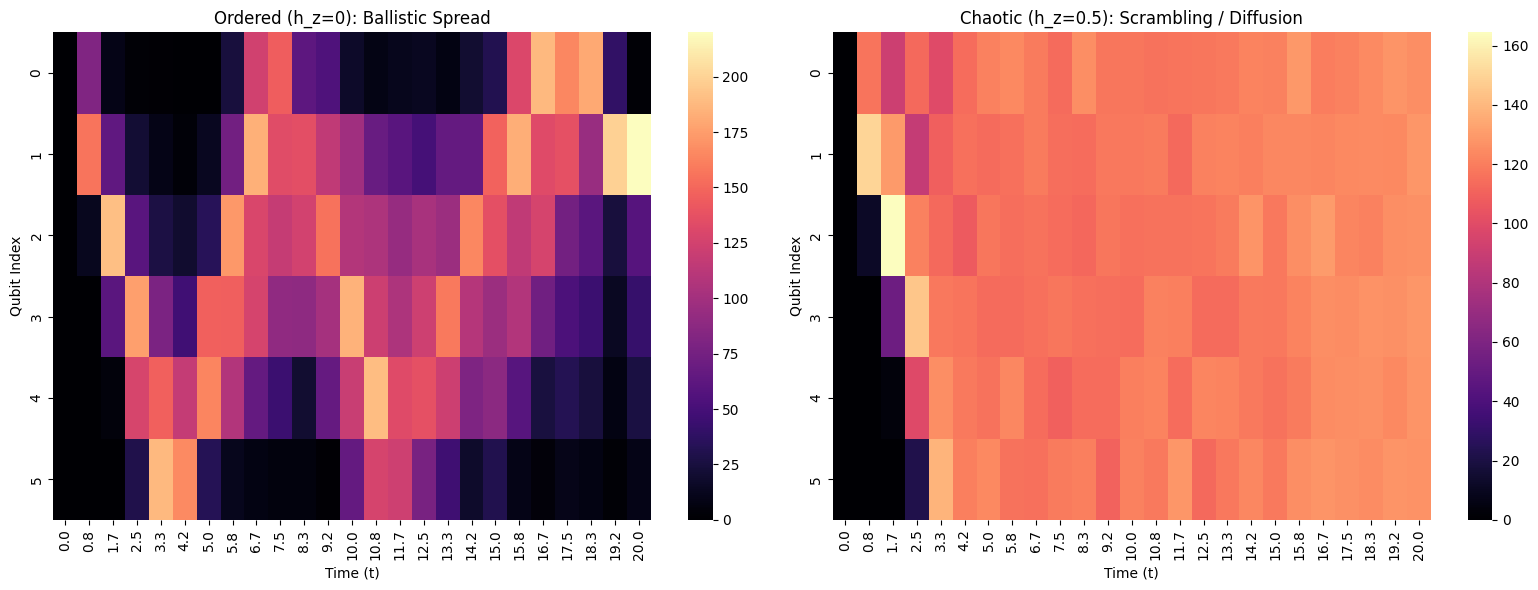


Comments:

Lieb-Robinson Light Cone: In both plots, there is diagonal front (the V-shape) starting at $t=0$ on Qubit 0.
 This confirms that information has a finite speed limit ($v_B$) as it travels down the chain.


Ordered (Left) = Ballistic Echoes. Stripes: bright spots that reappear near Qubit 0 after hitting Qubit 5.
 Information travels like solid particle, hits wall (end of chain) and bounces back coherently.
 System preserves information's structure. POINCARE RECURRENCE because we move back to original state.


Chaotic (Right) = Scrambling & Thermalization
 Fog: once a qubit turns bright (purple/white), it stays that way.
 Information has scrambled. It isn't bouncing back; it is diffusing and filling every available degree of freedom.
 By t=20, whole system is essentially a uniform quantum fog = perfect model for how information is hidden in Black Hole.


In [ ]:
# ==========================================
# OTOC: LIGHT CONE OF SCRAMBLING
# ==========================================

"""
* OTOC Heatmap in modern many-body physics papers allows to visualize Light Cone of
  quantum information spreading in real-time (standard plot in quantum chaos papers):
  Instead of looking at just last qubit, look at all of them to see LIUGHT CONE OF SCRAMBLING.

* Plotting OTOC for every qubit $i=0$ to $N-1$) over time creates image of QUANTUM BUTTERFLY EFFECT.
  It's proof of how information spreads (physically flying through system and bouncing off edges)
* CODE: Calculates the OTOC between the first qubit and every other qubit in the chain.

* Heatmap with Light Cone Boundary:
  Diagonal line of "light" (color) moving from the top-left (Qubit 0, $t=0$) towards the bottom-right.
  This is the LIEB-ROBINSON BOUND = In non-relativistic quantum mechanics, information cannot travel
  faster than a specific "speed of sound" determined by the Hamiltonian.

* Ordered (Left): has stripes. The information hits the edge of the chain and reflects.
  You see the color intensity bounce back toward Qubit 0.
  This is hallmark of an integrable system — the information remains "PARTICLE-LIKE"

* Chaotic (Right): light cone smears out. Once the color reaches a qubit, it stays bright.
  There is no clear reflection; instead, the whole chain eventually turns a uniform color.
  This is SCRAMBLING: information evolved from a local flip into a global fog that fills entire system.

* Slope of diagonal line is the BUTTERFLY VELOLCITY $v_B$:
  Increase interaction strength $J$ and slope gets steeper (information moves faster).
  Increase the chaos ($h_z$), the "fog" behind the front becomes thicker and more uniform.

* Diagram is the bridge to BLACK HOLE PHYSICS:
  In a black hole, that red "fog" appears almost instantly.
  It is the fastest possible way to hide a information in the universe.
"""

def calculate_otoc_heatmap(num_qubits, h_x, h_z, t_max, t_steps):
    """
    Calculates OTOC for all qubits over time to visualize the Light Cone.
    """
    qubits = cirq.LineQubit.range(num_qubits)
    times = np.linspace(0, t_max, t_steps)
    # Matrix to store results: Rows = Qubits, Cols = Time
    heatmap_data = np.zeros((num_qubits, t_steps))

    # V is always X on the first qubit (The "Butterfly")
    op_list_V = [np.eye(2)] * num_qubits
    op_list_V[0] = np.array([[0, 1], [1, 0]]) # Pauli X
    V = op_list_V[0]
    for i in range(1, num_qubits):
        V = np.kron(V, op_list_V[i])

    print(f"Generating Heatmap (h_z={h_z})...")

    for t_idx, t in enumerate(times):
        if t == 0: continue

        # Get the global Unitary for this time point
        U = get_unitary_from_circuit(qubits, t, h_x, h_z) # Using previous function
        U_dag = U.conj().T

        # Calculate OTOC for each qubit j as the "Probe"
        for j in range(num_qubits):
            # W is Z on qubit j
            op_list_W = [np.eye(2)] * num_qubits
            op_list_W[j] = np.array([[1, 0], [0, -1]]) # Pauli Z

            # Construct W matrix
            W = op_list_W[0]
            for k in range(1, num_qubits):
                W = np.kron(W, op_list_W[k])

            # Heisenberg evolution: W(t) = U^dag * W * U
            W_t = U_dag @ W @ U

            # Commutator magnitude
            commutator = W_t @ V - V @ W_t
            heatmap_data[j, t_idx] = np.linalg.norm(commutator) ** 2

    return times, heatmap_data

# --- Execution ---
n_qubits = 6 # Kept small for simulation speed
t_max = 20.0
t_steps = 25

# Generate data for Chaotic vs Ordered
_, data_ordered = calculate_otoc_heatmap(n_qubits, 1.0, 0.0, t_max, t_steps)
times, data_chaotic = calculate_otoc_heatmap(n_qubits, 1.0, 0.5, t_max, t_steps)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(data_ordered, ax=ax1, cmap='magma', xticklabels=np.round(times, 1))
ax1.set_title("Ordered (h_z=0): Ballistic Spread")
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Qubit Index")

sns.heatmap(data_chaotic, ax=ax2, cmap='magma', xticklabels=np.round(times, 1))
ax2.set_title("Chaotic (h_z=0.5): Scrambling / Diffusion")
ax2.set_xlabel("Time (t)")
ax2.set_ylabel("Qubit Index")

plt.tight_layout()
plt.show()
print("\nComments:\n")
print("Lieb-Robinson Light Cone: In both plots, there is diagonal front (the V-shape) starting at $t=0$ on Qubit 0.")
print(" This confirms that information has a finite speed limit ($v_B$) as it travels down the chain.")
print("\n")
print("Ordered (Left) = Ballistic Echoes. Stripes: bright spots that reappear near Qubit 0 after hitting Qubit 5.")
print(" Information travels like solid particle, hits wall (end of chain) and bounces back coherently.")
print(" System preserves information's structure. POINCARE RECURRENCE because we move back to original state.")
print("\n")
print("Chaotic (Right) = Scrambling & Thermalization")
print(" Fog: once a qubit turns bright (purple/white), it stays that way.")
print(" Information has scrambled. It isn't bouncing back; it is diffusing and filling every available degree of freedom.")
print(" By t=20, whole system is essentially a uniform quantum fog = perfect model for how information is hidden in Black Hole.")